In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
def calculate_technical_indicators(newdf):
    import ta 
        
    newdf['rsi_14'] = ta.momentum.rsi(close=newdf['<CLOSE>'], window=14)
    newdf['rsi_28'] = ta.momentum.rsi(close=newdf['<CLOSE>'], window=28)
    newdf['ema5'] = ta.trend.ema_indicator(newdf['<CLOSE>'], window=5)
    newdf['ema10'] = ta.trend.ema_indicator(newdf['<CLOSE>'], window=10)
    newdf['ema20'] = ta.trend.ema_indicator(newdf['<CLOSE>'], window=20)
    newdf['ema50'] = ta.trend.ema_indicator(newdf['<CLOSE>'], window=50)
    newdf['ema100'] = ta.trend.ema_indicator(newdf['<CLOSE>'], window=100)
    newdf['ema100'] = ta.trend.ema_indicator(newdf['<CLOSE>'], window=100)
    newdf['ema200'] = ta.trend.ema_indicator(newdf['<CLOSE>'], window=200)
    newdf['macd']=ta.trend.macd_diff(newdf['<CLOSE>'], window_slow=9, window_fast=12, window_sign=26)
    #newdf['obv']=ta.volume.on_balance_volume(newdf.close, newdf.volume, fillna=False)
    newdf['roc']=ta.momentum.roc(newdf['<CLOSE>'], window = 10)
    newdf['cci']=ta.trend.cci(newdf['<HIGH>'], newdf['<LOW>'], newdf['<CLOSE>'], window=14)
    newdf['atr']=ta.volatility.average_true_range(newdf['<HIGH>'], newdf['<LOW>'], newdf['<CLOSE>'], window=14)
    # stochastic oscillator
    newdf['stoch'] = ta.momentum.stoch(newdf['<HIGH>'], newdf['<LOW>'], newdf['<CLOSE>'], window=14)   
    newdf['stoch_signal'] = ta.momentum.stoch_signal(newdf['<HIGH>'], newdf['<LOW>'], newdf['<CLOSE>'], window=14)
    # bollinger bands
    newdf['bb_bbm'] = ta.volatility.bollinger_mavg(newdf['<CLOSE>'], window=20)
    newdf['bb_bbh'] = ta.volatility.bollinger_hband(newdf['<CLOSE>'], window=20)
    newdf['bb_bbl'] = ta.volatility.bollinger_lband(newdf['<CLOSE>'], window=20)
    # stochastic rsi oscillator
    newdf['stochrsi_k'] = ta.momentum.stochrsi(newdf['<CLOSE>'], window=14)
    newdf['stochrsi_d'] = ta.momentum.stochrsi(newdf['<CLOSE>'], window=14)
    # ichimoku kinkō hyō
    newdf['ichimoku_a'] = ta.trend.ichimoku_a(newdf['<HIGH>'], newdf['<LOW>'], window1=9, window2=26)
    newdf['ichimoku_b'] = ta.trend.ichimoku_b(newdf['<HIGH>'], newdf['<LOW>'], window2=26, window3=52)
    newdf['ichimoku_base_line'] = ta.trend.ichimoku_base_line(newdf['<HIGH>'], newdf['<LOW>'], window1=9, window2=26)
    newdf['ichimoku_conversion_line'] = ta.trend.ichimoku_conversion_line(newdf['<HIGH>'], newdf['<LOW>'], window1=9, window2=26)
    newdf = newdf.dropna()
    return newdf


In [3]:
data = pd.read_csv('EURUSD_Daily_200001030000_201912310000.csv', sep = '\t')
# data.drop('Unnamed: 0',axis=1 , inplace=True)
# data.drop('pivot',axis=1 , inplace=True)

In [4]:
data['<DATE>'] = pd.to_datetime(data['<DATE>'])


In [5]:
data

,<DATE>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<TICKVOL>,<VOL>,<SPREAD>
0,2000-01-03,1.00730,1.02780,1.00540,1.02460,6642,0,50
1,2000-01-04,1.02430,1.03400,1.02130,1.02920,7339,0,50
2,2000-01-05,1.02930,1.04020,1.02840,1.03260,6570,0,50
3,2000-01-06,1.03250,1.04150,1.02720,1.03300,7223,0,50
4,2000-01-07,1.03290,1.03320,1.02600,1.02980,5689,0,50
...,...,...,...,...,...,...,...,...
5194,2019-12-24,1.10895,1.10939,1.10690,1.10851,22030,0,1
5195,2019-12-26,1.10900,1.11088,1.10820,1.10974,10530,0,1
5196,2019-12-27,1.10973,1.11882,1.10940,1.11760,36676,0,1
5197,2019-12-30,1.11754,1.12206,1.11713,1.11985,36372,0,1


In [6]:
tdata  = calculate_technical_indicators(data)

In [7]:
train = tdata[tdata['<DATE>'].dt.year<2018] 
test = tdata[tdata['<DATE>'].dt.year>=2018]



In [8]:
tdata

,<DATE>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<TICKVOL>,<VOL>,<SPREAD>,rsi_14,rsi_28,...,stoch_signal,bb_bbm,bb_bbh,bb_bbl,stochrsi_k,stochrsi_d,ichimoku_a,ichimoku_b,ichimoku_base_line,ichimoku_conversion_line
199,2000-10-06,0.86950,0.87420,0.86650,0.86820,5875,0,50,43.001010,42.129782,...,46.983011,0.868050,0.890247,0.845853,0.596464,0.596464,0.875750,0.894150,0.873950,0.877550
200,2000-10-09,0.86850,0.87120,0.86660,0.86840,4614,0,50,43.179670,42.213595,...,43.468073,0.868540,0.890309,0.846771,0.603356,0.603356,0.875750,0.888750,0.873950,0.877550
201,2000-10-10,0.86840,0.87460,0.86590,0.87150,6098,0,50,46.004768,43.528260,...,44.131579,0.868940,0.890618,0.847262,0.514620,0.514620,0.874275,0.886650,0.872350,0.876200
202,2000-10-11,0.87150,0.87680,0.86400,0.86490,6446,0,50,41.296999,41.446395,...,35.719833,0.869175,0.890569,0.847781,0.000000,0.000000,0.873625,0.886600,0.872350,0.874900
203,2000-10-12,0.86500,0.86820,0.86120,0.86260,6364,0,50,39.769669,40.742183,...,23.070330,0.869085,0.890574,0.847596,0.000000,0.000000,0.872925,0.881550,0.872350,0.873500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5194,2019-12-24,1.10895,1.10939,1.10690,1.10851,22030,0,1,49.816216,50.694827,...,27.322062,1.108639,1.116936,1.100341,0.113957,0.113957,1.111145,1.109015,1.109015,1.113275
5195,2019-12-26,1.10900,1.11088,1.10820,1.10974,10530,0,1,52.147527,51.750672,...,31.976623,1.109131,1.116398,1.101864,0.263373,0.263373,1.111145,1.109015,1.109015,1.113275
5196,2019-12-27,1.10973,1.11882,1.10940,1.11760,36676,0,1,63.739808,57.746902,...,49.574959,1.109973,1.117063,1.102884,1.000000,1.000000,1.110867,1.109015,1.109015,1.112720
5197,2019-12-30,1.11754,1.12206,1.11713,1.11985,36372,0,1,66.259571,59.250272,...,68.745919,1.110890,1.118110,1.103670,1.000000,1.000000,1.112210,1.110080,1.110080,1.114340


In [9]:
def triple_barrier_m(data, length, height):
    """
    Generate labels according to the 'Triple Barrier Method' and 
    Calculates a metric balance of the labels,
    between 0 and 1, with 1 being the perfect balance.
    
    Args:
        data (dataframe):
        length (int): candles for vertical barrier.
        height (float): percentage for horizontal barriers
    Returns:
        datacopy (dataframe):
            Copy of dataframe input, adding label column.
        metrica_balance (float): between 0 and 1.
    """
    datacopy = data.copy()
    output = list()
    # I lose the last "length" data, so that it does not
    # calculate them with a decreasing candle window.
    for i in range(len(data)-length):

        df = datacopy['<CLOSE>'][i:i+length]
        df = np.array(df)
        upper_band = df[0]*(1+height/100) 
        lower_band = df[0]*(1-height/100)

        etiquetas = np.where(df >= upper_band, 1,
                             (np.where(df <= lower_band, -1, 0)))

        if any(etiquetas != 0):
            # If there are labels other than 0,
            # I want the first one to happen.
            output.append(etiquetas[etiquetas != 0][0])
        else:
            output.append(0)
    datacopy.drop(datacopy.index[-length:],axis=0, inplace=True)
    datacopy["labels"] = np.array(output) 
    
    #Metric label balance calculation
    if len(pd.value_counts(datacopy.labels)) == 3:
        a = pd.value_counts(datacopy.labels).iloc[0]/len(datacopy)
        b = pd.value_counts(datacopy.labels).iloc[1]/len(datacopy)  
        c = pd.value_counts(datacopy.labels).iloc[-1]/len(datacopy)
        metrica_balance = (a*b*c)/(1/3)**3
    else:
        metrica_balance = 0
    
    return datacopy, metrica_balance

def estudio_labels(data, porcentajes, velas):
    """
    Calculates for a given grid of percentages and candles,
    the "balance metric", between 0 and 1, with 1 being the perfect balance between the
    between the labels of the "Triple Barrier Method".
    
    Args:
        data (dataframe)
        porcentajes (array): different amplitudes of horizontal barriers
        velas (array): different amplitudes of vertical barriers
        
    Returns:
        df_estudio_labels (dataframe)
        
    """
    df_estudio_labels = pd.DataFrame(columns=porcentajes,
                                              index=velas)
    df_estudio_labels.index.rename("Velas", inplace=True)
    df_estudio_labels.columns.rename("Porcentajes", inplace=True)
    for i, length in enumerate(velas):
        for j, height in enumerate(porcentajes):
            
            *_, metrica_balance = triple_barrier_m(data, length, height)
            
            df_estudio_labels.iloc[i, j] = metrica_balance
    return df_estudio_labels


In [10]:
dollarbars_labels, *_ = triple_barrier_m(data=tdata,
                                     length=10,
                                     height=0.5)
dollarbars_labels.head()


,<DATE>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<TICKVOL>,<VOL>,<SPREAD>,rsi_14,rsi_28,...,bb_bbm,bb_bbh,bb_bbl,stochrsi_k,stochrsi_d,ichimoku_a,ichimoku_b,ichimoku_base_line,ichimoku_conversion_line,labels
199,2000-10-06,0.8695,0.8742,0.8665,0.8682,5875,0,50,43.001010,42.129782,...,0.868050,0.890247,0.845853,0.596464,0.596464,0.875750,0.89415,0.87395,0.87755,-1
200,2000-10-09,0.8685,0.8712,0.8666,0.8684,4614,0,50,43.179670,42.213595,...,0.868540,0.890309,0.846771,0.603356,0.603356,0.875750,0.88875,0.87395,0.87755,-1
201,2000-10-10,0.8684,0.8746,0.8659,0.8715,6098,0,50,46.004768,43.528260,...,0.868940,0.890618,0.847262,0.514620,0.514620,0.874275,0.88665,0.87235,0.87620,-1
202,2000-10-11,0.8715,0.8768,0.8640,0.8649,6446,0,50,41.296999,41.446395,...,0.869175,0.890569,0.847781,0.000000,0.000000,0.873625,0.88660,0.87235,0.87490,-1
203,2000-10-12,0.8650,0.8682,0.8612,0.8626,6364,0,50,39.769669,40.742183,...,0.869085,0.890574,0.847596,0.000000,0.000000,0.872925,0.88155,0.87235,0.87350,-1


In [11]:
dollarbars_labels.labels.value_counts()

labels
 1    2548
-1    2315
 0     127
Name: count, dtype: int64

In [12]:
porcentajes = np.array(np.arange(0.1, 1.1, 0.05))
velas = np.array(range(5, 55, 5))

df_resultados_optimizacion = estudio_labels(data=tdata,
                                            porcentajes=porcentajes, 
                                            velas=velas)
df_resultados_optimizacion


Porcentajes,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50,0.55,0.60,0.65,0.70,0.75,0.80,0.85,0.90,0.95,1.00,1.05
Velas,,,,,,,,,,,,,,,,,,,,
5,0.006739,0.050542,0.115936,0.20601,0.306783,0.408636,0.528354,0.662606,0.771176,0.865952,0.936089,0.973459,0.995895,0.994951,0.978808,0.948456,0.906207,0.851016,0.797979,0.736141
10,0,0,0.001351,0.005398,0.020147,0.02946,0.055763,0.102014,0.162786,0.225798,0.313008,0.40214,0.496197,0.58329,0.666686,0.737363,0.802046,0.860514,0.907995,0.937239
15,0,0,0,0,0,0,0.008092,0.018814,0.034773,0.050572,0.08166,0.120941,0.175027,0.2223,0.291319,0.354284,0.420201,0.490687,0.554305,0.606113
20,0,0,0,0,0,0,0.001353,0.002704,0.008098,0.012133,0.02283,0.036111,0.068873,0.089437,0.133544,0.172605,0.227189,0.269398,0.310306,0.357086
25,0,0,0,0,0,0,0,0,0,0.001354,0.004056,0.009449,0.0282,0.041449,0.062438,0.079245,0.111194,0.142398,0.164504,0.200541
30,0,0,0,0,0,0,0,0,0,0,0,0.001354,0.012157,0.018866,0.028221,0.036176,0.058588,0.075482,0.087097,0.111299
35,0,0,0,0,0,0,0,0,0,0,0,0,0.00542,0.009471,0.017546,0.021558,0.032255,0.042858,0.05341,0.066493
40,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.006778,0.010827,0.016225,0.028284,0.036286,0.046886
45,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.002717,0.005427,0.010845,0.020272,0.024304,0.026986


In [13]:
optimo = df_resultados_optimizacion[
    df_resultados_optimizacion == max(df_resultados_optimizacion.max())
]
optimo.dropna(axis=1, how="all", inplace=True)
optimo.dropna(axis=0, how="all", inplace=True)

f"La mejor combinacion del grid es con length={optimo.index[0]} y height={round(optimo.columns[0],2)}"


'La mejor combinacion del grid es con length=5 y height=0.7'

In [14]:
dollarbars_labels, *_ = triple_barrier_m(data=tdata, length=5, height=0.7)
dollarbars_labels.labels.value_counts()


labels
 1    1785
-1    1633
 0    1577
Name: count, dtype: int64

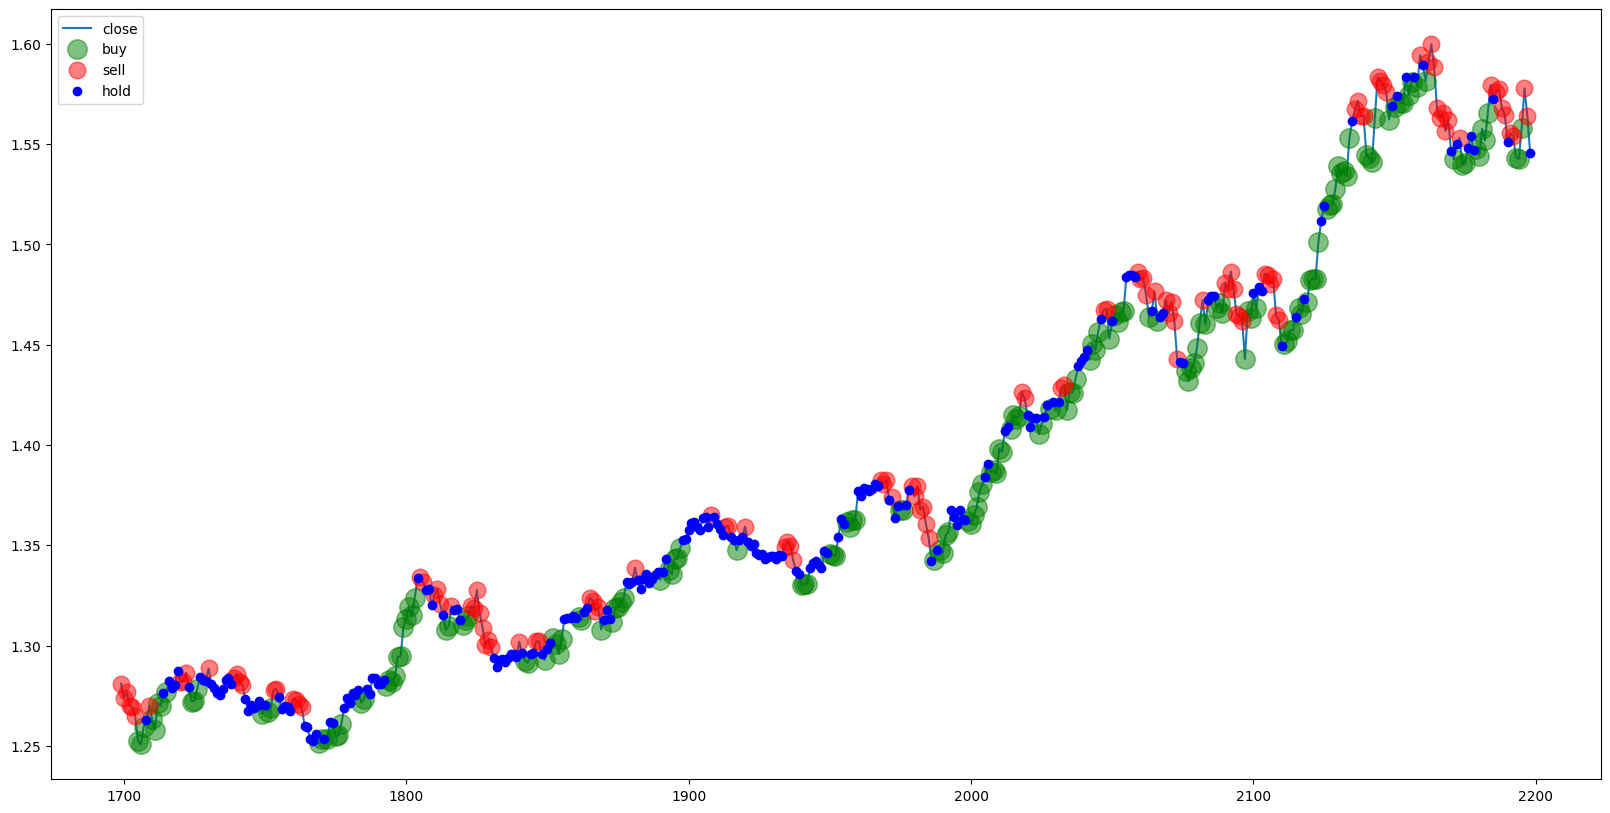

In [20]:
tempslice = dollarbars_labels.iloc[1500:2000]
# plot the data with the label 
plt.figure(figsize=(20,10))
plt.plot(tempslice['<CLOSE>'])
plt.plot(tempslice[tempslice['labels']==1]['<CLOSE>'],'o',color='g', alpha=0.5 , markersize=14)
plt.plot(tempslice[tempslice['labels']==-1]['<CLOSE>'],'o',color='r', alpha=0.5 , markersize=12)
plt.plot(tempslice[tempslice['labels']==0]['<CLOSE>'],'o',color='b')
# add legend
plt.legend(['close','buy','sell','hold'])
plt.show()


In [15]:
datall = dollarbars_labels

In [16]:
datall

,<DATE>,<OPEN>,<HIGH>,<LOW>,<CLOSE>,<TICKVOL>,<VOL>,<SPREAD>,rsi_14,rsi_28,...,bb_bbm,bb_bbh,bb_bbl,stochrsi_k,stochrsi_d,ichimoku_a,ichimoku_b,ichimoku_base_line,ichimoku_conversion_line,labels
199,2000-10-06,0.86950,0.87420,0.86650,0.86820,5875,0,50,43.001010,42.129782,...,0.868050,0.890247,0.845853,0.596464,0.596464,0.875750,0.894150,0.873950,0.877550,0
200,2000-10-09,0.86850,0.87120,0.86660,0.86840,4614,0,50,43.179670,42.213595,...,0.868540,0.890309,0.846771,0.603356,0.603356,0.875750,0.888750,0.873950,0.877550,-1
201,2000-10-10,0.86840,0.87460,0.86590,0.87150,6098,0,50,46.004768,43.528260,...,0.868940,0.890618,0.847262,0.514620,0.514620,0.874275,0.886650,0.872350,0.876200,-1
202,2000-10-11,0.87150,0.87680,0.86400,0.86490,6446,0,50,41.296999,41.446395,...,0.869175,0.890569,0.847781,0.000000,0.000000,0.873625,0.886600,0.872350,0.874900,-1
203,2000-10-12,0.86500,0.86820,0.86120,0.86260,6364,0,50,39.769669,40.742183,...,0.869085,0.890574,0.847596,0.000000,0.000000,0.872925,0.881550,0.872350,0.873500,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5189,2019-12-17,1.11435,1.11745,1.11291,1.11487,35410,0,1,63.641008,56.704273,...,1.107128,1.116449,1.097806,1.000000,1.000000,1.110480,1.107020,1.109015,1.111945,0
5190,2019-12-18,1.11483,1.11541,1.11102,1.11127,31490,0,1,55.486944,53.280991,...,1.107330,1.116825,1.097834,0.591041,0.591041,1.110480,1.107020,1.109015,1.111945,0
5191,2019-12-19,1.11126,1.11442,1.11072,1.11204,34743,0,1,56.762988,53.898333,...,1.107641,1.117323,1.097959,0.464479,0.464479,1.110823,1.107535,1.109015,1.112630,0
5192,2019-12-20,1.11201,1.11246,1.10662,1.10751,29734,0,1,48.038162,49.877305,...,1.107925,1.117234,1.098617,0.000000,0.000000,1.111058,1.108450,1.109015,1.113100,1


In [29]:
train = datall[datall['<DATE>'].dt.year<2018] 
test = datall[datall['<DATE>'].dt.year>=2018]

train.drop(['<DATE>'],axis=1,inplace=True)
test.drop(['<DATE>'],axis=1,inplace=True)
X_train = train.drop(['labels'],axis=1)
y_train = train.labels
X_test = test.drop(['labels'],axis=1)
y_test = test.labels
y_test.value_counts()

labels
 0    270
-1    135
 1    108
Name: count, dtype: int64

In [30]:
from sklearn.ensemble import RandomForestClassifier
rfclf = RandomForestClassifier(random_state=0).fit(X_train, y_train)
rfy_train_predict=rfclf.predict(X_train)
rfy_test_predict=rfclf.predict(X_test)
print('RF: ')
evall(y_test,rfy_test_predict)
classprecision(y_test,rfy_test_predict)

RF: 
Accuracy is :  0.23976608187134502 
Balanced Accuracy is :  0.30493827160493825 
Macro Average f1 is : 0.24204285477886148
Class:  0 Precision :  0.10740740740740741
Class:  1 Precision :  0.5555555555555556
Class:  -1 Precision :  0.2518518518518518


In [31]:
# scale the data using StandardScaler and train
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Create a 5 point sequence to train lstm model
sequence_length = 7
# create a function to reshape the given X_train and X_test into 5 point sequences and last point label from y_train 
def reshape_data(X,y):
    X_new = []
    y_new = []
    for i in range(sequence_length,len(X)):
        X_new.append(X[i-sequence_length:i])
        #print(X_new)
        y_new.append(y.iloc[i])
    return np.array(X_new),pd.Series( y_new)

# reshape the data
X_train_lstm, y_train_lstm = reshape_data(X_train_scaled,y_train)
X_test_lstm, y_test_lstm = reshape_data(X_test_scaled,y_test)
y_train_lstm.replace(-1,0,inplace=True)
y_test_lstm.replace(-1,0,inplace=True)


In [32]:
X_train_lstm.shape

(4475, 7, 30)

In [49]:
# create a lstm model
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense, TimeDistributed
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
# create a lstm model
from keras.utils import to_categorical

# Assuming y_train_lstm and y_val_lstm contain integer class labels
num_classes = 3  

y_train_lstm_one_hot = to_categorical(y_train_lstm, num_classes=num_classes)
y_test_lstm_one_hot = to_categorical(y_test_lstm, num_classes=num_classes)

model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train_lstm.shape[1],X_train_lstm.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50,return_sequences=False))
model.add(Dense(units=64,activation='relu'))
model.add(Dense(units=3,activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
# fit the model
model.fit(X_train_lstm,y_train_lstm_one_hot,epochs=100,batch_size=32)



Epoch 1/100
140/140 [==============================] - 3s 5ms/step - loss: 0.7265 - accuracy: 0.6047
Epoch 2/100
140/140 [==============================] - 1s 5ms/step - loss: 0.6579 - accuracy: 0.6239
Epoch 3/100
140/140 [==============================] - 1s 5ms/step - loss: 0.6527 - accuracy: 0.6177
Epoch 4/100
140/140 [==============================] - 1s 5ms/step - loss: 0.6489 - accuracy: 0.6183
Epoch 5/100
140/140 [==============================] - 1s 5ms/step - loss: 0.6471 - accuracy: 0.6266
Epoch 6/100
140/140 [==============================] - 1s 5ms/step - loss: 0.6460 - accuracy: 0.6299
Epoch 7/100
140/140 [==============================] - 1s 6ms/step - loss: 0.6439 - accuracy: 0.6304
Epoch 8/100
140/140 [==============================] - 1s 5ms/step - loss: 0.6383 - accuracy: 0.6317
Epoch 9/100
140/140 [==============================] - 1s 5ms/step - loss: 0.6368 - accuracy: 0.6284
Epoch 10/100
140/140 [==============================] - 1s 5ms/step - loss: 0.6307 - accura

In [22]:
y_pred =  model.predict(X_train_lstm)


140/140 [==============================] - 1s 2ms/step


In [23]:
y_pred[0]

array([5.5267876e-01, 4.4714209e-01, 1.7913181e-04], dtype=float32)

In [24]:
# Hyperparameters
input_size = X_train_lstm.shape[2]
hidden_size = 50
num_layers = 1
num_classes = 3
learning_rate = 0.001
num_epochs = 20
batch_size = 32


In [25]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

# Assuming X_train_lstm, y_train_lstm, X_test_lstm, and y_test_lstm are your data tensors

# Convert numpy arrays to PyTorch tensors
X_train_lstm = torch.Tensor(X_train_lstm)
y_train_lstm = torch.LongTensor(y_train_lstm)

X_test_lstm = torch.Tensor(X_test_lstm)
y_test_lstm = torch.LongTensor(y_test_lstm)

# Convert integer labels to one-hot encoded labels
y_train_lstm_one_hot = torch.nn.functional.one_hot(y_train_lstm, num_classes=num_classes)
y_test_lstm_one_hot = torch.nn.functional.one_hot(y_test_lstm, num_classes=num_classes)

# Define the LSTM model
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(LSTMModel, self).__init__()
        self.lstm1 = nn.LSTM(input_size=input_size, hidden_size=hidden_size, num_layers=num_layers, batch_first=True, dropout=0.2)
        self.lstm2 = nn.LSTM(hidden_size, hidden_size, num_layers=num_layers, batch_first=True, dropout=0.2)
        self.lstm3 = nn.LSTM(hidden_size, hidden_size, num_layers=num_layers, batch_first=True, dropout=0.2)
        self.fc1 = nn.Linear(hidden_size, 64)
        self.fc2 = nn.Linear(64, num_classes)

    def forward(self, x):
        out, _ = self.lstm1(x)
        out, _ = self.lstm2(out)
        out, _ = self.lstm3(out)
        out = out[:, -1, :]  # Select the last time step output
        out = torch.relu(self.fc1(out))
        out = self.fc2(out)
        return torch.nn.functional.softmax(out, dim=1)


# Create the model, loss function, and optimizer
model = LSTMModel(input_size, hidden_size, num_layers, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Prepare data loaders
train_dataset = TensorDataset(X_train_lstm, y_train_lstm)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=False)

val_dataset = TensorDataset(X_test_lstm, y_test_lstm)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

In [26]:
# Lists to store training and validation losses and accuracies
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

# Training loop
for epoch in range(num_epochs):
    model.train()
    total_train_loss = 0.0
    correct_train = 0
    total_train = 0

    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_train_loss += loss.item()

        _, predicted = torch.max(outputs, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

    train_accuracy = correct_train / total_train
    train_losses.append(total_train_loss / len(train_loader))
    train_accuracies.append(train_accuracy)

    # Validation loop
    model.eval()
    total_val_loss = 0.0
    correct_val = 0
    total_val = 0

    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            total_val_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

    val_accuracy = correct_val / total_val
    val_losses.append(total_val_loss / len(val_loader))
    val_accuracies.append(val_accuracy)

    print(f'Epoch [{epoch + 1}/{num_epochs}], '
          f'Train Loss: {train_losses[-1]:.4f}, Train Acc: {train_accuracy:.4f}, '
          f'Validation Loss: {val_losses[-1]:.4f}, Validation Acc: {val_accuracy:.4f}')



Epoch [1/20], Train Loss: 0.9340, Train Acc: 0.6192, Validation Loss: 0.7622, Validation Acc: 0.7925
Epoch [2/20], Train Loss: 0.9249, Train Acc: 0.6253, Validation Loss: 0.7627, Validation Acc: 0.7925
Epoch [3/20], Train Loss: 0.9244, Train Acc: 0.6253, Validation Loss: 0.7629, Validation Acc: 0.7925
Epoch [4/20], Train Loss: 0.9228, Train Acc: 0.6253, Validation Loss: 0.7633, Validation Acc: 0.7925
Epoch [5/20], Train Loss: 0.9240, Train Acc: 0.6253, Validation Loss: 0.7659, Validation Acc: 0.7925
Epoch [6/20], Train Loss: 0.9229, Train Acc: 0.6253, Validation Loss: 0.7683, Validation Acc: 0.7925
Epoch [7/20], Train Loss: 0.9199, Train Acc: 0.6253, Validation Loss: 0.7680, Validation Acc: 0.7925
Epoch [8/20], Train Loss: 0.9146, Train Acc: 0.6253, Validation Loss: 0.7708, Validation Acc: 0.7925
Epoch [9/20], Train Loss: 0.9149, Train Acc: 0.6253, Validation Loss: 0.7757, Validation Acc: 0.7925
Epoch [10/20], Train Loss: 0.9098, Train Acc: 0.6253, Validation Loss: 0.8104, Validation A

In [27]:
# Evaluate the model on the test set
model.eval()
with torch.no_grad():
    test_outputs = model(X_test_lstm)
    _, predicted = torch.max(test_outputs, 1)
    test_accuracy = (predicted == y_test_lstm).sum().item() / y_test_lstm.size(0)
    test_f1 = f1_score(y_test_lstm, predicted.cpu().numpy(), average='weighted')

print(f'Test Accuracy: {test_accuracy * 100:.2f}%')
print(f'Test F1 Score: {test_f1:.4f}')


Test Accuracy: 77.67%
Test F1 Score: 0.6929
